### EDA Content: 
- What are the top 10 Product categories based on sales?
- Who are the most valuable customers?
- In each country , which product is sold the most?
- Sales were highest on which day?
- Sales trend in the countries over time
- Top 5 Most common countries
- Top 5 Least common countries
- Total unit price sold by year
- Total quantity sold by invoiceno 
- Total quantity sold by Stockcode 
- StockCode Feature Analysis
- Description Feature Analysis
- Custumers Analysis
- Transaction Analysis based on time 

RFM Analysis - Time series analysis for marketing RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

Which country has more valuable customers ?

Who are the most valuable customers?

Who is the most frequent and least frequent customer?

Which customers spent the most and least?

We will be computing who are most valuable customers are by calculating their overall RFM scores

### Customer Segment analysis, KMeans Clustering and Hierarchical Clustering
-Segment customers into multiple groups according to their RFM Scores   
-Segment customers using Recency, Frequeny and Monetary analysis scores via KMeans clustering   
-Segment customer with RFM dataset via Hierarchical clustering using dendrograms

In [0]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set(rc={'figure.figsize':(7,5)})

In [0]:
# Path to Retail Data-set
retaildata = pd.read_excel("/content/online_retail_II.xlsx")

In [0]:
retaildata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [0]:
retaildata.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [0]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [0]:
print('Shape of dataset: ', retaildata.shape)

Shape of dataset:  (525461, 8)


In [0]:
def extract_column_types(df):
    num_cols = [i for i in df.columns if df[i].dtype in ['int64','float64']]
    cat_cols = [i for i in df.columns if df[i].dtype in ['object']]
    date_cols = [i for i in df.columns if df[i].dtype in ['datetime64[ns]']]
    bool_cols = [i for i in df.columns if df[i].dtype in ['bool']]
    return(num_cols,cat_cols,date_cols,bool_cols)

In [0]:
num_cols,cat_cols,date_cols,bool_cols = extract_column_types(retaildata)
print ("Numeric Columns:", len(num_cols))
print ("Categorical Columns:", len(cat_cols))
print ("Date Columns:",len(date_cols))
print ("Boolean Columns:",len(bool_cols))

Numeric Columns: 3
Categorical Columns: 4
Date Columns: 1
Boolean Columns: 0


In [0]:
#Filtering the dataset by choosing positive values of Quantity and retaildata
filtered_retaildata = retaildata[(retaildata.Quantity>0) & (retaildata.Price > 0)].copy()

In [0]:
print('Shape of filtered dataset: ', filtered_retaildata.shape)

Shape of filtered dataset:  (511566, 8)


#### What are the top 10 Product categories based on sales?

In [0]:
prod_bought = filtered_retaildata.groupby('Description').agg({'Quantity':np.sum}).reset_index()

In [0]:
x = prod_bought.sort_values('Quantity' , ascending=False).Description.head(10)
y = prod_bought.sort_values('Quantity' , ascending=False).Quantity.head(10)

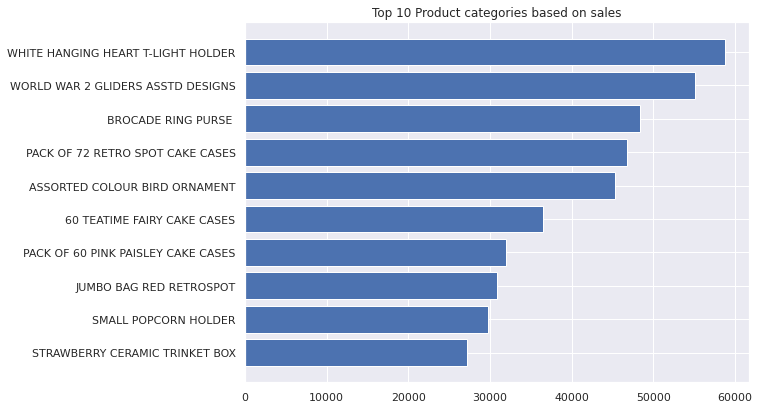

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x,y)
ax.invert_yaxis()
ax.set_title('Top 10 Product categories based on sales')
plt.show()

#### Product with highest sales in each country?

In [0]:
country_count = retaildata.groupby(['Country','Description']).agg({'Quantity':np.sum}).reset_index()

In [0]:
country_count.columns = ['Country','Description','Count']

In [0]:
filtered_retaildata['Revenue'] = filtered_retaildata.Price * filtered_retaildata.Quantity

In [0]:
for i in country_count.Country.unique():
    temp = country_count[country_count.Country == i]
    prod = temp.Description[temp.Count == np.max(temp.Count)].values[0]
    count = np.max(temp.Count)
    revenue = np.round((np.sum(filtered_retaildata.Revenue[(filtered_retaildata.Description == prod) & (filtered_retaildata.Country == i)])),2)
    print ("Product with highest sales in {} is {} \n The sales count (in units) is : {} and revenue generated is {} ".format(i,prod,count,revenue))
    print('-----------------------------------------------------')

Product with highest sales in Australia is 60 CAKE CASES DOLLY GIRL DESIGN 
 The sales count (in units) is : 504 and revenue generated is 214.8 
-----------------------------------------------------
Product with highest sales in Austria is MINI HIGHLIGHTER PENS 
 The sales count (in units) is : 120 and revenue generated is 14.4 
-----------------------------------------------------
Product with highest sales in Bahrain is WHITE TALL PORCELAIN T-LIGHT HOLDER 
 The sales count (in units) is : 102 and revenue generated is 202.5 
-----------------------------------------------------
Product with highest sales in Belgium is PACK OF 60 MUSHROOM CAKE CASES 
 The sales count (in units) is : 264 and revenue generated is 145.2 
-----------------------------------------------------
Product with highest sales in Bermuda is BOYS ALPHABET IRON ON PATCHES 
 The sales count (in units) is : 1152 and revenue generated is 241.92 
-----------------------------------------------------
Product with highest 

In [0]:
filtered_retaildata.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [0]:
revenue_country_wise = filtered_retaildata.groupby('Country').agg({'Revenue':np.sum}).reset_index()

In [0]:
x1 = revenue_country_wise.sort_values('Revenue' , ascending=False).Country.head(10)
y1 = revenue_country_wise.sort_values('Revenue' , ascending=False).Revenue.head(10)

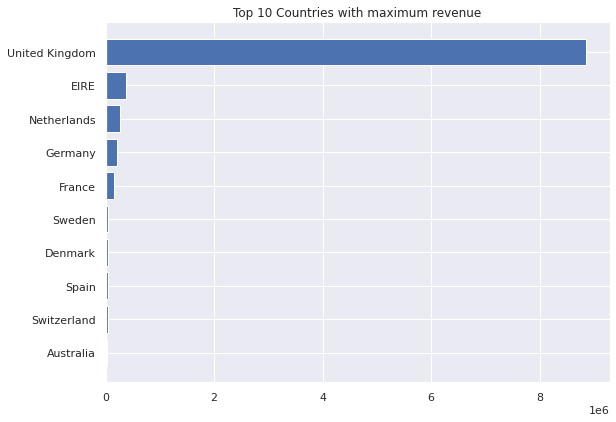

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x1,y1)
ax.invert_yaxis()
ax.set_title('Top 10 Countries with maximum revenue')
plt.show()

#### When were sales highest? On which day?

In [0]:
filtered_retaildata['InvoiceDateOnly'] = filtered_retaildata.InvoiceDate.apply(lambda x : x.date() )
date_sales = filtered_retaildata.groupby(['InvoiceDateOnly']).agg({'Quantity':np.sum}).reset_index()
date_sales = date_sales.sort_values(['Quantity'],ascending=False)

In [0]:
date_sales.head()

,InvoiceDateOnly,Quantity
243,2010-09-27,125534
202,2010-08-09,100236
57,2010-02-15,96591
83,2010-03-17,78885
36,2010-01-21,72914


In [0]:
print ("Highest sales occurred on {} ({} units).".format(date_sales.head(1).InvoiceDateOnly.values[0],date_sales.head(1).Quantity.values[0]))

Highest sales occurred on 2010-09-27 (125534 units).


In [0]:
print ("Lowest sales occurred on {} ({} units).".format(date_sales.tail(1).InvoiceDateOnly.values[0],date_sales.tail(1).Quantity.values[0]))

Lowest sales occurred on 2010-02-10 (3783 units).


#### Sale trends in  5 countries 

In [0]:
country_sales = filtered_retaildata.groupby(['Country']).agg({'Quantity':np.sum}).reset_index()

In [0]:
country_sales.sort_values(by=['Quantity'], ascending = False).head(5)

,Country,Quantity
37,United Kingdom,4720855
9,Denmark,229690
10,EIRE,193116
24,Netherlands,183616
12,France,163183


In [0]:
countries = country_sales.sort_values(by=['Quantity'], ascending = False).head(5).Country.tolist()

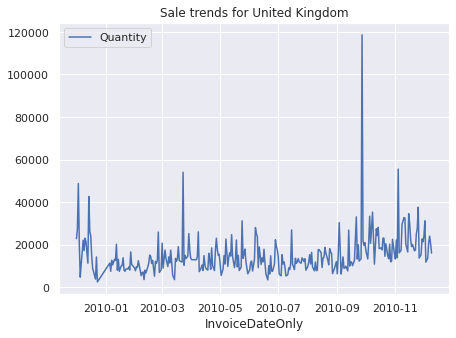

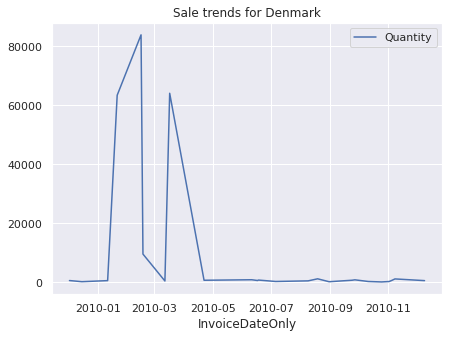

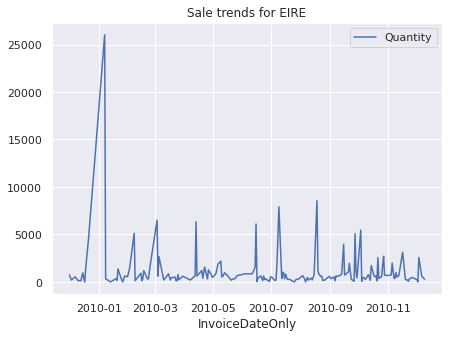

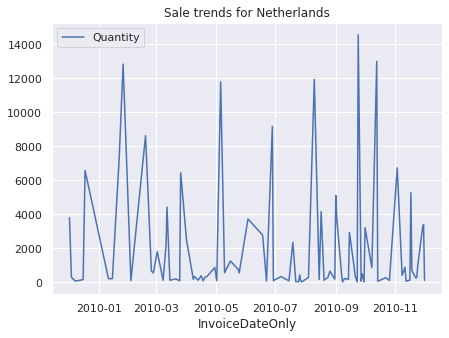

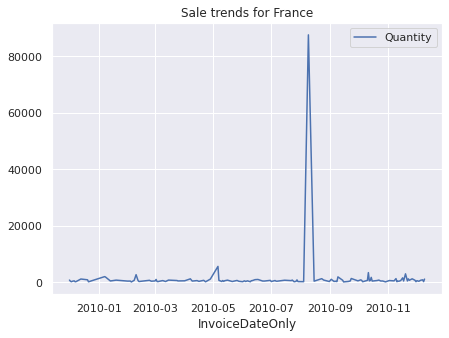

In [0]:
for country in countries:
    country_sales = filtered_retaildata[filtered_retaildata.Country ==country]
    temp = country_sales.groupby(['InvoiceDateOnly']).agg({'Quantity':np.sum}).reset_index().set_index('InvoiceDateOnly')
    temp.plot(title=('Sale trends for '+country))
    plt.show()


### Top 5 Most common countries

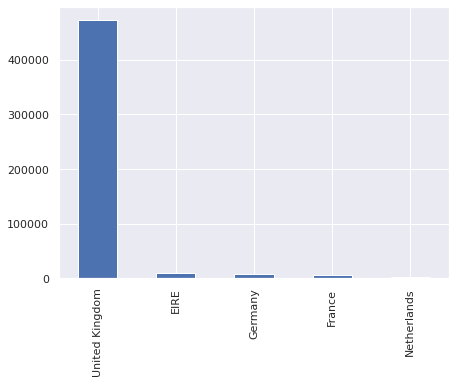

In [0]:
#Top 5 Most common countries
filtered_retaildata.Country.value_counts()[:5].plot(kind='bar')

### Top 5 least common countries

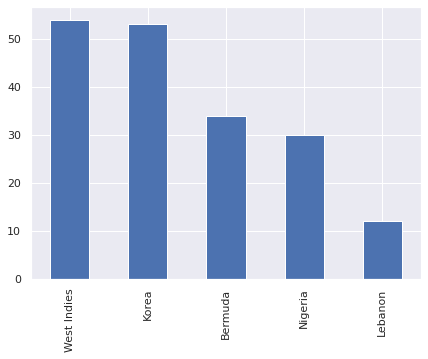

In [0]:
filtered_retaildata.Country.value_counts()[-5:].plot(kind='bar')

### Total unit price sold by year


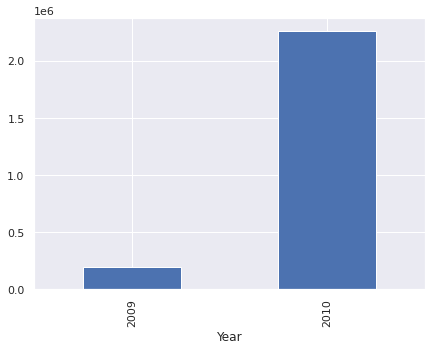

In [0]:
retaildata['Year'] = retaildata['InvoiceDate'].dt.year
retaildata.head()
retaildata.groupby('Year')['Price'].sum().plot(kind='bar')

### Total quantity sold by Invoiceno [Top 10]


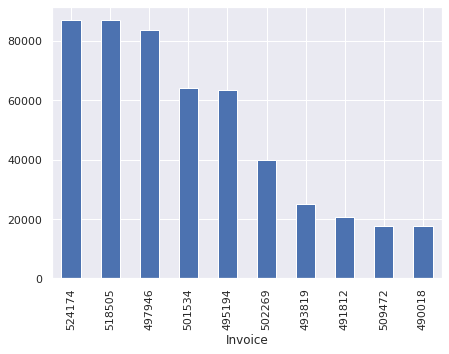

In [0]:

retaildata.groupby('Invoice')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

### Total quantity sold by Stock Code [Top 10]

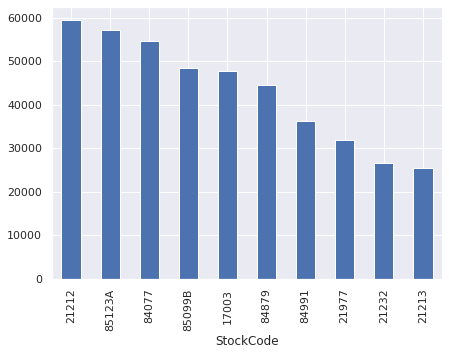

In [0]:
retaildata.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

#### StockCode 


In [0]:
retaildata.StockCode.nunique()

4632

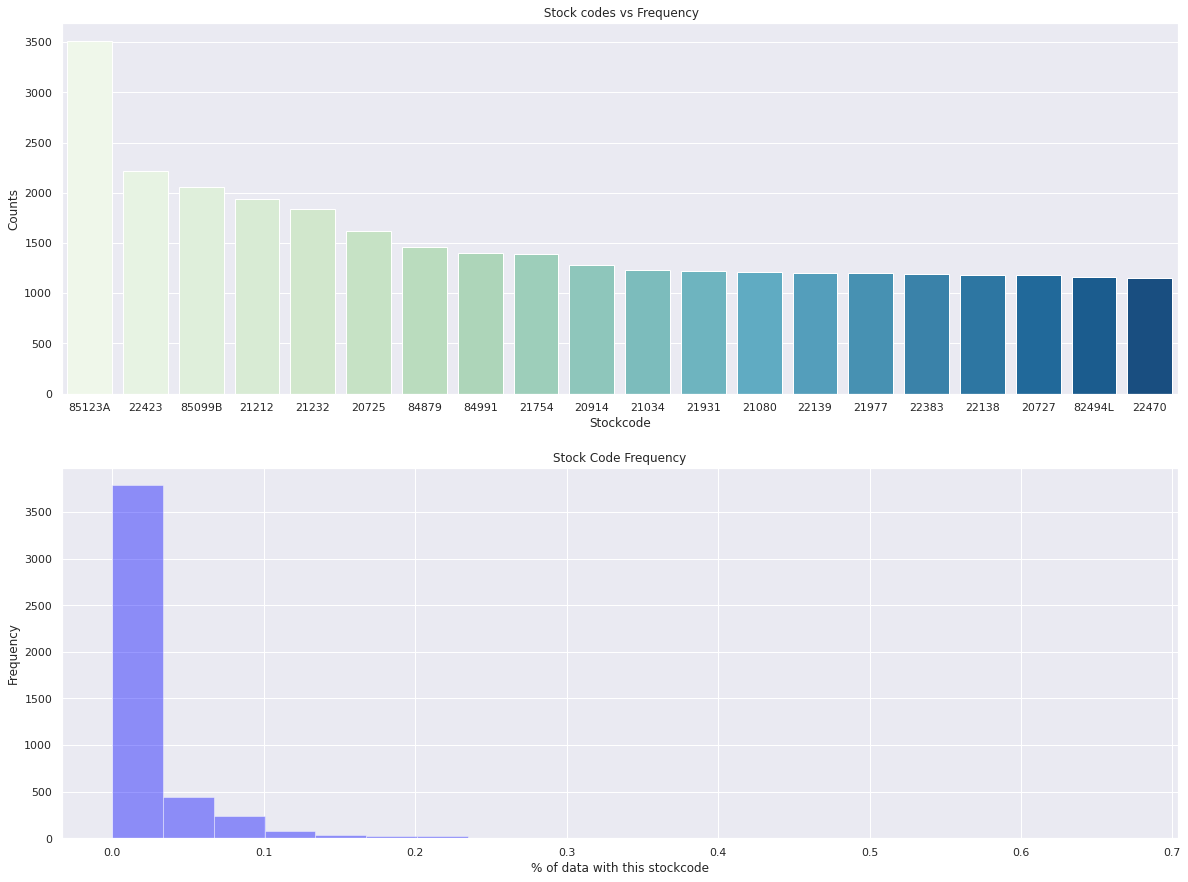

In [0]:
#Finding the Common StockCode
stockcode_counts = retaildata.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="GnBu")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title(" Stock codes vs Frequency");
sns.distplot(np.round(stockcode_counts/retaildata.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Blue")
ax[1].set_title("Stock Code Frequency")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");


Most stockcodes are very seldom. This indicates that the retailer sells many different products and that there is no strong corelation of a specific stockcode



### Descriptions

In [0]:
#Unique number of Descriptions
retaildata.Description.nunique()

4681

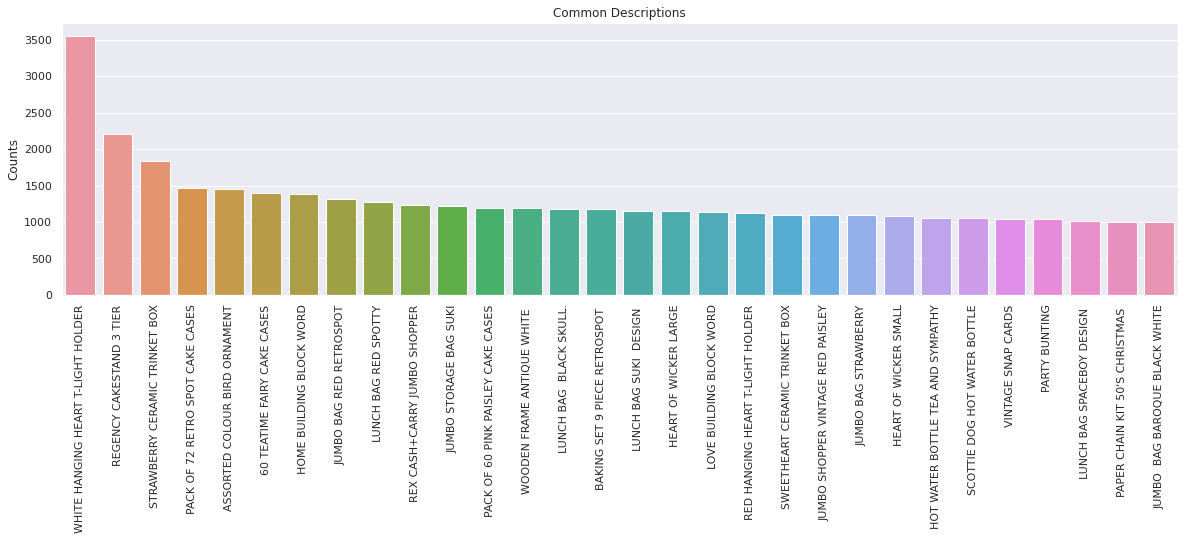

In [0]:
#Finding Common Descriptions
description_counts = retaildata.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values)
plt.ylabel("Counts")
plt.title("Common Descriptions");
plt.xticks(rotation=90);

### Customers

In [0]:
retaildata['Customer ID'].nunique()

4383

Most common Custumers


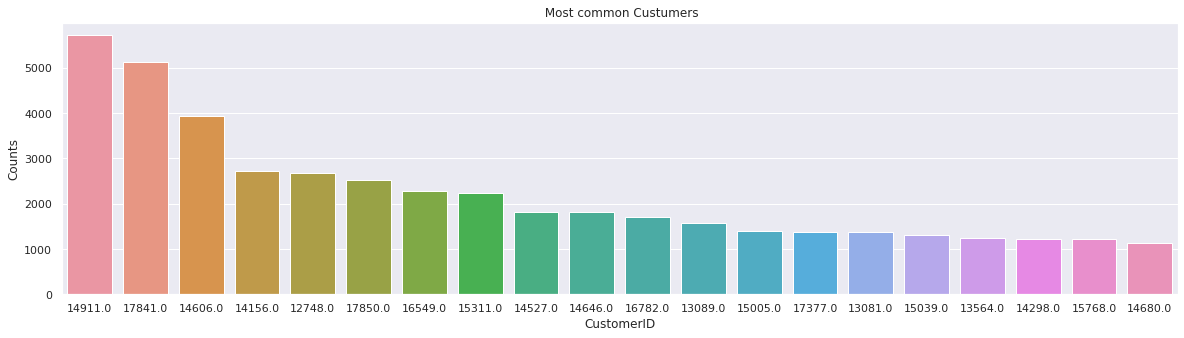

In [0]:
customer_counts = retaildata['Customer ID'].value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title(" Most common Custumers");

#### Transaction with respect to time of the day

In [0]:
# Writing helper functions to evaluate day, month, year and hour
def getMonth(value):
    return int(value.strftime('%m'))
def getDay(value):
    return int(value.strftime('%d'))
def getYear(value):
    return int(value.strftime('%Y'))
def getHour(value):
    return int(value.strftime('%H'))

# Evaluating the time
month=retaildata['InvoiceDate'].apply(getMonth)
day=retaildata['InvoiceDate'].apply(getDay)
year=retaildata['InvoiceDate'].apply(getYear)
hour=retaildata['InvoiceDate'].apply(getHour)

Text(0, 0.5, 'Txn Count')

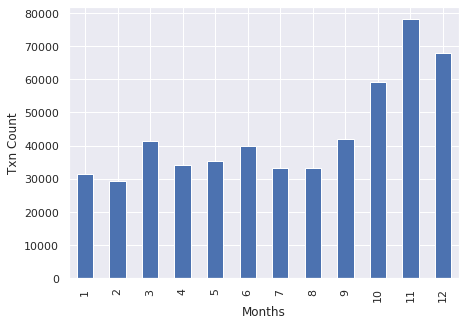

In [0]:
#Plot bar chart by Month
sales_plot = month.value_counts().sort_index().plot(kind='bar')
sales_plot.set_xlabel('Months')
sales_plot.set_ylabel('Txn Count')

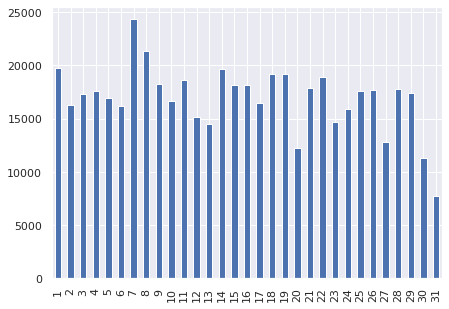

In [0]:
#Plot bar chart by Day
day.value_counts().sort_index().plot(kind='bar')

Text(0.5, 1.0, 'Avg Txns per Week')

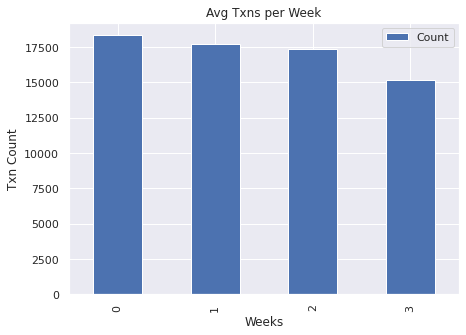

In [0]:
# Average Transactions per Week
day_sales = day.value_counts().sort_index()

week_data = ['Week1', 'Week2', 'Week3', 'Week4']
count_data = [day_sales[0:7].mean(),day_sales[7:14].mean(),day_sales[14:21].mean(),day_sales[21:].mean()]
data = {'Week': week_data, 
        'Count': count_data}
week_df = pd.DataFrame(data) 
week_df.reset_index().set_index('Week')

week_plot = week_df.plot(kind= 'bar')
week_plot.set_xlabel('Weeks')
week_plot.set_ylabel('Txn Count')
week_plot.set_title('Avg Txns per Week')


First week of every month has good sales count.
As the graph shows, the number of transactions declines after the 1st week, which signifies decreasing amounts of cash with people towards the end of the month.


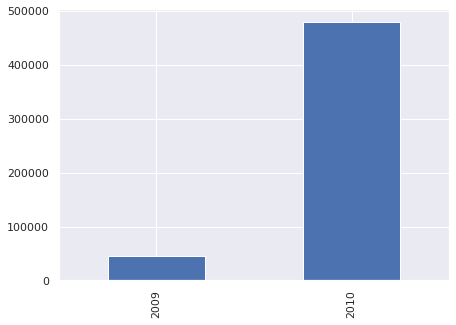

In [0]:
#Plot bar chart by Year
year.value_counts().sort_index().plot(kind='bar')

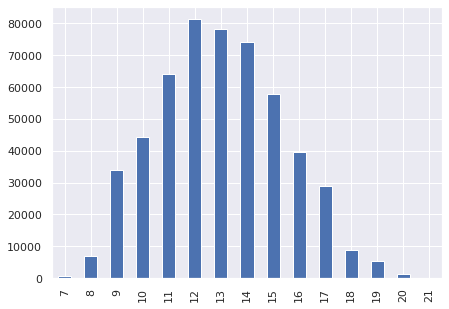

In [0]:
#Plot bar chart by Hour
hour.value_counts().sort_index().plot(kind='bar')



Huge sales are happening around 12 PM everyday


# RFM Analysis

#### Recency

In [0]:
from datetime import datetime,timedelta

In [0]:
filtered_retaildata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDateOnly
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [0]:
orders = filtered_retaildata.groupby(['Invoice', 'InvoiceDate', 'Customer ID']).agg({'Price': lambda x: x.sum()}).reset_index()
orders.head()

,Invoice,InvoiceDate,Customer ID,Price
0,489434,2009-12-01 07:45:00,13085.0,32.65
1,489435,2009-12-01 07:46:00,13085.0,10.50
2,489436,2009-12-01 09:06:00,13078.0,70.88
3,489437,2009-12-01 09:08:00,15362.0,83.45
4,489438,2009-12-01 09:24:00,18102.0,44.05


In [0]:
NOW = orders['InvoiceDate'].max() + timedelta(days=1)
NOW 

Timestamp('2010-12-10 20:01:00')

In [0]:
period = 365

In [0]:
orders['DaysSinceOrder'] = orders['InvoiceDate'].apply(lambda x: (NOW - x).days)

In [0]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'InvoiceDate': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
RFM = orders.groupby('Customer ID').agg(aggr).reset_index()
RFM.rename(columns={'DaysSinceOrder': 'Recency', 'InvoiceDate': 'Frequency'}, inplace=True)
RFM.head()

,Customer ID,Recency,Frequency
0,12346.0,165,11
1,12347.0,3,2
2,12348.0,74,1
3,12349.0,43,3
4,12351.0,11,1


In [0]:
RFM['Revenue'] = RFM['Customer ID'].apply(lambda x: orders[(orders['Customer ID'] == x) & \
                                                           (orders['InvoiceDate'] >= NOW - timedelta(days=period))]\
                                                           ['Price'].sum())
RFM.head()

,Customer ID,Recency,Frequency,Revenue
0,12346.0,165,11,206.36
1,12347.0,3,2,162.95
2,12348.0,74,1,14.39
3,12349.0,43,3,875.34
4,12351.0,11,1,49.46


In [0]:
quantiles = RFM[['Recency', 'Frequency', 'Revenue']].quantile([.2, .4, .6, .8]).to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Recency': {0.2: 15.0, 0.4: 36.0, 0.6: 71.0, 0.8: 176.0},
 'Revenue': {0.2: 41.842,
  0.4: 93.994,
  0.6: 183.26799999999997,
  0.8: 381.6700000000002}}

Score: 

    1 to the least 20 % percentile
    2 to the values in 20-40 % percentile
    3 to the values in 41-60 % percentile
    4 to the values in 61-80 % percentile
    5 to the values in 81-100 % percentile

In [0]:
def recency_score(x):
    if x <= quantiles['Recency'][.2]:
        return 5
    elif x <= quantiles['Recency'][.4]:
        return 4
    elif x <= quantiles['Recency'][.6]:
        return 3
    elif x <= quantiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def freq_mon_score(x, c):
    if x <= quantiles[c][.2]:
        return 1
    elif x <= quantiles[c][.4]:
        return 2
    elif x <= quantiles[c][.6]:
        return 3
    elif x <= quantiles[c][.8]:
        return 4
    else:
        return 5 

In [0]:
RFM['Recency_Score'] = RFM['Recency'].apply(lambda x: recency_score(x))
RFM['Frequency_Score'] = RFM['Frequency'].apply(lambda x: freq_mon_score(x, 'Frequency'))
RFM['Monetary_Score'] = RFM['Revenue'].apply(lambda x: freq_mon_score(x, 'Revenue'))

In [0]:
RFM['RFM_Score'] = RFM['Recency_Score'].map(str) + RFM['Frequency_Score'].map(str) + RFM['Monetary_Score'].map(str)
RFM.head()

,Customer ID,Recency,Frequency,Revenue,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346.0,165,11,206.36,2,5,4,254
1,12347.0,3,2,162.95,5,2,3,523
2,12348.0,74,1,14.39,2,1,1,211
3,12349.0,43,3,875.34,3,3,5,335
4,12351.0,11,1,49.46,5,1,2,512


The segments we figured out from RFM scores after some research:

| Segment                     | Description                                                                                     | Score      |
|-----------------------------|-------------------------------------------------------------------------------------------------|------------|
| Loyal Customers             | Bought recently, buy often and spend the most                                                   | [3-4][4-5] |
| Potential Loyalist          | Recent customers with average frequency                                                         | [4-5][2-3] |
| New Customers               | Bought most recently, but not often.                                                            | [1-2]5         |
| Promising                   | Recent shoppers, but haven’t spent much.                                                        | 41         |
| Needing Attention | Above average recency, frequency and monetary values. May not have bought very recently though. | 33         |
| At Risk                     | Below average recency and frequency, purchased long ago                                         | [1-2][3-4] |
| Hibernating                 | Haven't purchased in a long time                                                                | [1-2][1-2] |



In [0]:
segt_map = {
    r'[4-5][4-5]': 'Loyal Customers',
    r'[4-5][1-3]': 'Potential Loyalist',
    r'[1-2]5': 'New Customers',
    r'[2-4][1-2]': 'Promising',
    r'33': 'Needing Attention',
    r'[1-3][4-5]': 'At Risk',
    r'[1-2][1-3]': 'Hibernating',
}

RFM['RFM_Score'] = RFM['Recency_Score'].map(str) + RFM['Frequency_Score'].map(str)
RFM['Segment'] = RFM['RFM_Score'].replace(segt_map, regex=True)
RFM['RFM_Score'] = RFM['Recency_Score'].map(str) + RFM['Frequency_Score'].map(str)  + RFM['Monetary_Score'].map(str)

RFM.head()

,Customer ID,Recency,Frequency,Revenue,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,12346.0,165,11,206.36,2,5,4,254,New Customers
1,12347.0,3,2,162.95,5,2,3,523,Potential Loyalist
2,12348.0,74,1,14.39,2,1,1,211,Promising
3,12349.0,43,3,875.34,3,3,5,335,Needing Attention
4,12351.0,11,1,49.46,5,1,2,512,Potential Loyalist


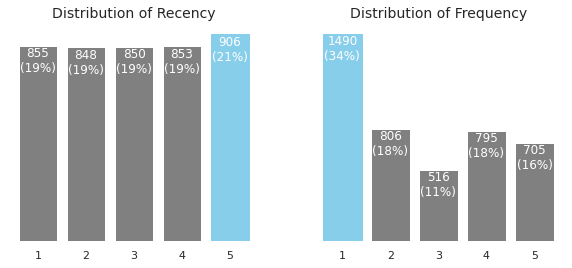

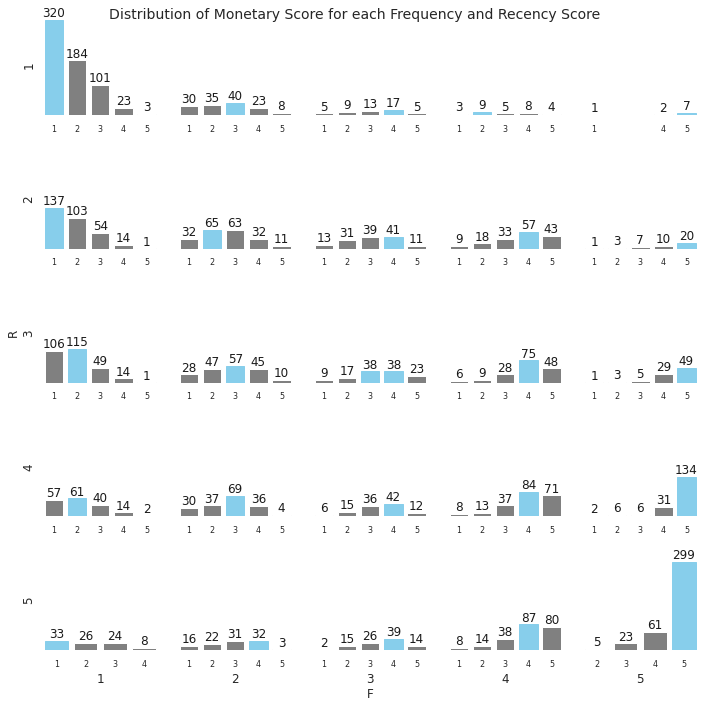

In [0]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['Recency_Score', 'Frequency_Score']):
    parameters = {'Recency_Score':'Recency', 'Frequency_Score':'Frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='grey')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('skyblue')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['Recency_Score'] == r) & (RFM['Frequency_Score'] == f)]['Monetary_Score'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='grey')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('skyblue')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of Monetary Score for each Frequency and Recency Score',
             fontsize=14)
plt.tight_layout()
plt.show()

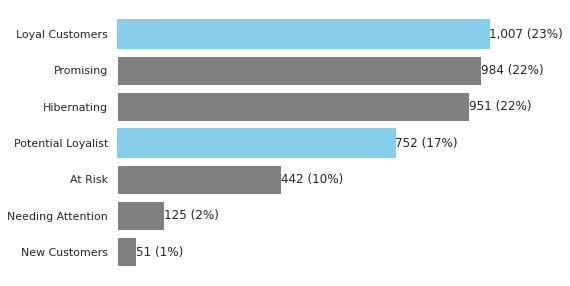

In [0]:
# count the number of customers in each segment
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='grey')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Potential Loyalist', 'Loyal Customers']:
            bar.set_color('skyblue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [0]:
RFM.head()

,Customer ID,Recency,Frequency,Revenue,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,12346.0,165,11,206.36,2,5,4,254,New Customers
1,12347.0,3,2,162.95,5,2,3,523,Potential Loyalist
2,12348.0,74,1,14.39,2,1,1,211,Promising
3,12349.0,43,3,875.34,3,3,5,335,Needing Attention
4,12351.0,11,1,49.46,5,1,2,512,Potential Loyalist


In [0]:
x2 = RFM.sort_values('Frequency' , ascending=False)['Customer ID'].head(10)
y2 = RFM.sort_values('Frequency' , ascending=False).Frequency.head(10)

In [0]:
x2 = x2.astype(str)

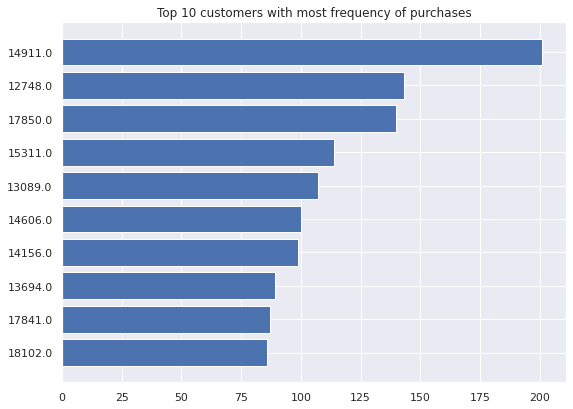

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x2,y2)
ax.invert_yaxis()
ax.set_title('Top 10 customers with most frequency of purchases')
plt.show()

In [0]:
#Count of customers for Recency Score
RFM.Recency_Score.value_counts()

5    906
1    855
4    853
3    850
2    848
Name: Recency_Score, dtype: int64

In [0]:
#Count of customers for  Frequency Score
RFM.Frequency_Score.value_counts()

1    1490
2     806
4     795
5     705
3     516
Name: Frequency_Score, dtype: int64

In [0]:
#Count of customers for Monetary Score
RFM.Monetary_Score.value_counts()

5    863
1    863
3    862
2    862
4    862
Name: Monetary_Score, dtype: int64

In [0]:
RFM.RFM_Score = RFM.RFM_Score.astype(str)

In [0]:
#Unique RFM Scores that we grouped into Segments
RFM.RFM_Score.unique()

array(['254', '523', '211', '335', '512', '522', '311', '112', '434',
       '425', '344', '544', '232', '111', '334', '134', '123', '333',
       '423', '424', '114', '323', '255', '514', '511', '223', '245',
       '113', '433', '444', '345', '212', '312', '313', '234', '555',
       '355', '455', '213', '545', '412', '124', '321', '432', '224',
       '435', '155', '244', '314', '533', '121', '422', '354', '322',
       '315', '454', '233', '221', '235', '142', '542', '443', '324',
       '535', '543', '445', '222', '531', '122', '413', '125', '225',
       '133', '214', '553', '243', '532', '452', '145', '325', '524',
       '231', '251', '431', '115', '411', '534', '132', '442', '343',
       '554', '352', '341', '513', '521', '242', '451', '144', '421',
       '332', '353', '414', '331', '131', '342', '135', '241', '143',
       '141', '541', '253', '154', '215', '525', '441', '453', '415',
       '151', '252', '552', '351'], dtype=object)

In [0]:
# Count of customers for each segment
RFM.Segment.value_counts()

Loyal Customers       1007
Promising              984
Hibernating            951
Potential Loyalist     752
At Risk                442
Needing Attention      125
New Customers           51
Name: Segment, dtype: int64

In [0]:
df_with_rfm = filtered_retaildata.merge(RFM)

#### Most valuable customers: 

In [0]:
print ("The 10 most valuable customers are:")
for i in RFM.sort_values('RFM_Score',ascending=False).head(10)['Customer ID']:
    print (str(int(i)))

The 10 most valuable customers are:
14081
15580
13448
17377
15716
17389
17402
17412
15680
13468


#### Country with most valuable customers: 

In [0]:
most_valuable_country = df_with_rfm.groupby(['Country','RFM_Score']).size().to_frame().reset_index()

In [0]:
print ("The country which has the most valuable customer is {}.".format(most_valuable_country[most_valuable_country.RFM_Score == np.max(most_valuable_country.RFM_Score)].Country.values[0]))

The country which has the most valuable customer is United Kingdom.


#### Frequent customers

In [0]:
print ("The most frequent customer is {}.".format(df_with_rfm[df_with_rfm.Frequency == df_with_rfm.Frequency.max()]['Customer ID'].unique()[0].astype(int)))

The most frequent customer is 17182.


In [0]:
print ("The least frequent customer is {}.".format(df_with_rfm[df_with_rfm.Frequency == df_with_rfm.Frequency.min()]['Customer ID'].unique()[0].astype(int)))

The least frequent customer is 15823.


#### Customer spending

In [0]:
print ("Customer who spent the most: {}.".format(df_with_rfm[df_with_rfm.Revenue == df_with_rfm.Revenue.max()]['Customer ID'].unique()[0].astype(int)))

Customer who spent the most: 12918.


In [0]:
print ("Customer who spent the least: {}.".format(df_with_rfm[df_with_rfm.Revenue == df_with_rfm.Revenue.min()]['Customer ID'].unique()[0].astype(int)))

Customer who spent the least: 14095.
